**Different fits using test data**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from reliability.Fitters import Fit_Weibull_2P
from fitter import Fitter
from scipy.stats import lognorm
import statsmodels.api as sm
from scipy.stats import lognorm, kstest

**Read the test dataset**

In [2]:
# df = pd.read_csv("/Users/preethamvignesh/Downloads/test/Statistical-Analysis-and-Forecasting-of-Solar-Energy-main/Stat_test.csv")
df = pd.read_csv("/home/jayanthikishore/Downloads/UK_project/SAGE/Stat_test.csv")
df.head()

,Date,GHI
0,2001-01-01 09:00:00,509
1,2001-01-01 10:00:00,557
2,2001-01-01 11:00:00,619
3,2001-01-01 12:00:00,342
4,2001-01-01 13:00:00,500


In [3]:
df.set_index('Date', inplace=True)
df

,GHI
Date,
2001-01-01 09:00:00,509
2001-01-01 10:00:00,557
2001-01-01 11:00:00,619
2001-01-01 12:00:00,342
2001-01-01 13:00:00,500
...,...
2009-12-31 11:00:00,761
2009-12-31 12:00:00,790
2009-12-31 13:00:00,492


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38325 entries, 2001-01-01 09:00:00 to 2009-12-31 15:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   GHI     38325 non-null  int64
dtypes: int64(1)
memory usage: 598.8+ KB


In [5]:
y = df['GHI']
stats.kstest(y, 'norm')

KstestResult(statistic=0.9998695368558382, pvalue=0.0)

In [6]:
y

Date
2001-01-01 09:00:00    509
2001-01-01 10:00:00    557
2001-01-01 11:00:00    619
2001-01-01 12:00:00    342
2001-01-01 13:00:00    500
                      ... 
2009-12-31 11:00:00    761
2009-12-31 12:00:00    790
2009-12-31 13:00:00    492
2009-12-31 14:00:00    283
2009-12-31 15:00:00    436
Name: GHI, Length: 38325, dtype: int64

In [7]:
# Just considering values GT 0
y = y[y>0]

In [8]:
# Perform the Kolmogorov-Smirnov test for goodness of fit.
stats.kstest(y, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [9]:
#replace Nan to 0 in the dataset
y.replace([np.inf, -np.inf,0], 1, inplace=True)

In [10]:
stats.kstest(y, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [11]:
# Lognoraml fit
sigma, loc, scale = lognorm.fit(y, floc=0)

In [12]:
stat, p = kstest(y, 'lognorm', args=(sigma, 0, scale), alternative='two-sided')
stat,p

(0.11242487358520048, 0.0)

In [13]:
params = stats.lognorm.fit(y)
params

(0.012385503293117047, -14847.276788717487, 15549.226915227977)

In [14]:
stats.kstest(y, "lognorm", params)

KstestResult(statistic=0.07454467571135537, pvalue=1.240021724360214e-185)

((array([-4.13063373, -3.92201283, -3.8081614 , ...,  3.8081614 ,
          3.92201283,  4.13063373]),
  array([  80,   81,   81, ..., 1045, 1046, 1055])),
 (189.52930795657812, 702.5420146137786, 0.9815461456345487))

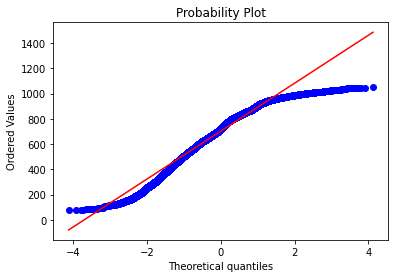

In [15]:
stats.probplot(y, dist="norm", plot=pylab)

- Fitter package to start fitting different distributions and finding out the best-suited distribution for the data.
- It used Scipy library in the backend for distribution fitting and support 80 distributions.

In [16]:
f = Fitter(y)

In [17]:
f.fit()

/home/jayanthikishore/anaconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/jayanthikishore/anaconda3/lib/python3.8/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


- Summary: different distributions and fit statistics such as "sumsquare_error", "Akaike information Criterion (aic)", "Bayesian information criterion (bic)", "Kullback-Leibler Divergence (kl-div)" values.

- kl-divergence score, quantifies how much one probability distribution differx from another probability distribution. kl-divergence between two distribtutions Q and P.


,sumsquare_error,aic,bic,kl_div
beta,8.04995e-06,1476.26,-853864,0.0310793
genextreme,8.49355e-06,1473.34,-851819,0.0354076
dgamma,1.06188e-05,1513.19,-843262,0.0762322
dweibull,1.09246e-05,1514.9,-842174,0.076405
burr,1.15316e-05,1465.15,-840091,0.0367256


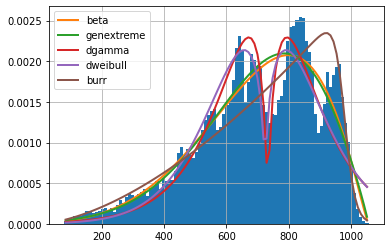

In [18]:
f.summary()

- Quantile-Quantile (Q-Q plot) is a probability plot and comparing two probability distributions by plotting their quantile against each other.
- Probabilit-Probability (P-P plot) is a probability plot for assessing how closely two datasets agree, which plots the two cumulative distribution functions against each other.

- A P-P plot compares the empirical cumulative distribution function of a data set with a specified theoritical cumulative distribution function F(.).
- A Q-Q plot compares the quantiles of a data distribution with the quantiles of a stadardized theoritical distribution from a specified family of distributions.

https://towardsdatascience.com/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

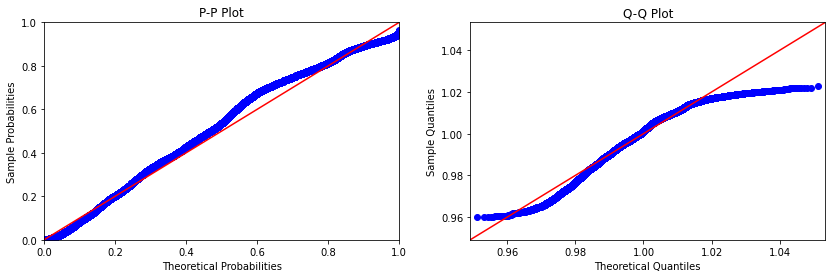

In [19]:
ig, ax = plt.subplots(1, 2, figsize=(14, 4))
probplot = sm.ProbPlot(y, dist=lognorm, fit=True)
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('P-P Plot')
ax[1].set_title('Q-Q Plot')
plt.show()


In [20]:
display(stats.kstest(y, 'gamma', (15.5, 7)))
display(stats.kstest(y, 'norm'))
display(stats.kstest(y, "lognorm", params))
display(stats.kstest(y, 'loggamma', (15.5, 7)))
display(stats.kstest(y, 'expon'))


KstestResult(statistic=0.9999999999999999, pvalue=0.0)

KstestResult(statistic=1.0, pvalue=0.0)

KstestResult(statistic=0.07454467571135537, pvalue=1.240021724360214e-185)

KstestResult(statistic=1.0, pvalue=0.0)

KstestResult(statistic=1.0, pvalue=0.0)

In [21]:
args = stats.weibull_min.fit(y)
kstest(y, 'weibull_min', args=args, N=100000)

KstestResult(statistic=0.8092041372174357, pvalue=0.0)